In [1]:
import pandas as pd
import numpy as np
import os
import random
from copy import deepcopy
import math
from itertools import product
import pickle
import joblib

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

In [73]:
from supervised.automl import AutoML

In [2]:
user_df = pd.read_csv('./data/user_spec.csv')
loan_df = pd.read_csv('./data/loan_result.csv')

In [3]:
log_df = pd.read_csv('./data/log_data.csv')

In [3]:
merged_df = pd.merge(user_df, loan_df, on='application_id')

In [4]:
merged_df.to_csv('./customData/merged_user_loan.csv')

In [2]:
merged_df = pd.read_csv('./customData/merged_user_loan.csv', index_col=0)

In [3]:
merged_df.columns

Index(['application_id', 'user_id', 'birth_year', 'gender', 'insert_time',
       'credit_score', 'yearly_income', 'income_type', 'company_enter_month',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'loanapply_insert_time',
       'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'is_applied'],
      dtype='object')

In [4]:
merged_df.sort_values(['user_id','loanapply_insert_time'], inplace=True)

In [5]:
merged_df.dropna(inplace=True)

In [6]:
merged_df.shape

(594841, 23)

In [7]:
(merged_df['is_applied']==1).sum()

35872

In [8]:
merged_df.reset_index(inplace=True)

In [9]:
merged_df['index']=merged_df.index

In [10]:
merged_df.columns

Index(['index', 'application_id', 'user_id', 'birth_year', 'gender',
       'insert_time', 'credit_score', 'yearly_income', 'income_type',
       'company_enter_month', 'employment_type', 'houseown_type',
       'desired_amount', 'purpose', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt', 'loanapply_insert_time', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied'],
      dtype='object')

In [11]:
tmp=merged_df.drop(['application_id', 'user_id','insert_time','index','loanapply_insert_time', 'bank_id', 'product_id'],axis=1)

In [12]:
cate_list = [
    'income_type',
    'employment_type',
    'houseown_type',
    'purpose',]

In [13]:
tmp.shape, tmp[tmp['is_applied']==1].shape

((594841, 17), (35872, 17))

In [14]:
for cate in cate_list:
    tmp = pd.get_dummies(data = tmp, columns=[cate], prefix=cate)

In [15]:
tmp =pd.concat([tmp[tmp['is_applied']==0].sample(35872, random_state=42), tmp[tmp['is_applied']==1].sample(35872, random_state=42)])

In [16]:
X,y =tmp.loc[:, tmp.columns !='is_applied'] ,tmp['is_applied']

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier(random_state=42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
model.score(X_test,y_test)

0.8149696842985574

In [21]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.8174630457201788

In [22]:
confusion_matrix(y_test, y_pred)

array([[5749, 1446],
       [1209, 5945]])

In [23]:
print(*sorted(zip(model.feature_importances_, X_test.columns), reverse=True), sep='\n')

(0.17669453178641592, 'credit_score')
(0.17422555789441435, 'loan_rate')
(0.10966848362038831, 'loan_limit')
(0.0911802331985813, 'desired_amount')
(0.07316401850252927, 'company_enter_month')
(0.07020765954422956, 'existing_loan_amt')
(0.0650954087485928, 'yearly_income')
(0.06452869709823061, 'birth_year')
(0.05049083989721915, 'existing_loan_cnt')
(0.01720350127681259, 'income_type_EARNEDINCOME')
(0.01273285867218163, 'purpose_생활비')
(0.012394416368376814, 'gender')
(0.009566323806808422, 'houseown_type_전월세')
(0.009199760277871151, 'houseown_type_기타가족소유')
(0.007593612652192456, 'purpose_대환대출')
(0.007558039525775338, 'employment_type_정규직')
(0.006493953851784805, 'houseown_type_자가')
(0.0064693852902628956, 'employment_type_기타')
(0.006194119056616814, 'income_type_EARNEDINCOME2')
(0.005152871447833591, 'employment_type_계약직')
(0.004292445194494787, 'income_type_PRIVATEBUSINESS')
(0.0037845460118602005, 'personal_rehabilitation_yn')
(0.002934464607936977, 'income_type_PRACTITIONER')
(0.00

In [74]:
rf =AutoML()

In [75]:
rf.fit(X_train,y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models


Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 51649 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 51649 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 51068 missing from current font.
Glyph 50857 missing from current font.
Glyph 51649 missing from current font.
Glyph 51068 missing from current font.
Glyph 50857 missing from current font.
Glyph 51649 missing from current font.
Glyph 51221 missing from current font.
Glyph 44508 missing from current font.
Glyph 51649 missing from current font.
Glyph 51221 missing from current font.
Glyph 44508 missing from current font.
Glyph 51649 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 44032 missing from current font.
Glyph 51313 missing from 

AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 0.693147 trained in 1.29 seconds


Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 51649 missing from current font.
Glyph 51452 missing from current font.
Glyph 53469 missing from current font.
Glyph 44396 missing from current font.
Glyph 51077 missing from current font.
Glyph 53804 missing from current font.
Glyph 51088 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 51649 missing from current font.
Glyph 51452 missing from current font.
Glyph 53469 missing from current font.
Glyph 44396 missing from current font.
Glyph 51077 missing from current font.
Glyph 53804 missing from current font.
Glyph 51088 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from 

2_DecisionTree logloss 0.57226 trained in 26.41 seconds


Glyph 51204 missing from current font.
Glyph 50900 missing from current font.
Glyph 49464 missing from current font.
Glyph 48372 missing from current font.
Glyph 51613 missing from current font.
Glyph 44552 missing from current font.
Glyph 53804 missing from current font.
Glyph 51088 missing from current font.
Glyph 51452 missing from current font.
Glyph 53469 missing from current font.
Glyph 44396 missing from current font.
Glyph 51077 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 51649 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 51068 missing from current font.
Glyph 50857 missing from current font.
Glyph 51221 missing from current font.
Glyph 44508 missing from current font.
Glyph 44032 missing from current font.
Glyph 51313 missing from current font.
Glyph 49548 missing from current font.
Glyph 50976 missing from current font.
Glyph 51204 missing from 

* Step default_algorithms will try to check up to 3 models


Glyph 51088 missing from current font.
Glyph 44032 missing from current font.
Glyph 51204 missing from current font.
Glyph 50900 missing from current font.
Glyph 49464 missing from current font.
Glyph 45824 missing from current font.
Glyph 54872 missing from current font.
Glyph 52636 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 51313 missing from current font.
Glyph 49548 missing from current font.
Glyph 50976 missing from current font.
Glyph 49373 missing from current font.
Glyph 54876 missing from current font.
Glyph 48708 missing from current font.
Glyph 51088 missing from current font.
Glyph 44032 missing from current font.
Glyph 51204 missing from current font.
Glyph 50900 missing from current font.
Glyph 49464 missing from current font.
Glyph 45824 missing from current font.
Glyph 54872 missing from current font.
Glyph 52636 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from 

3_Default_Xgboost logloss 0.422665 trained in 51.44 seconds


Glyph 49373 missing from current font.
Glyph 54876 missing from current font.
Glyph 48708 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 44032 missing from current font.
Glyph 51313 missing from current font.
Glyph 49548 missing from current font.
Glyph 50976 missing from current font.
Glyph 45824 missing from current font.
Glyph 54872 missing from current font.
Glyph 52636 missing from current font.
Glyph 51452 missing from current font.
Glyph 53469 missing from current font.
Glyph 44396 missing from current font.
Glyph 51077 missing from current font.
Glyph 49324 missing from current font.
Glyph 50629 missing from current font.
Glyph 51088 missing from current font.
Glyph 44552 missing from current font.
Glyph 51204 missing from current font.
Glyph 50900 missing from current font.
Glyph 49464 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 51649 missing from 

4_Default_NeuralNetwork logloss 0.484598 trained in 33.4 seconds


Glyph 51204 missing from current font.
Glyph 50900 missing from current font.
Glyph 49464 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 44032 missing from current font.
Glyph 51313 missing from current font.
Glyph 49548 missing from current font.
Glyph 50976 missing from current font.
Glyph 51088 missing from current font.
Glyph 49373 missing from current font.
Glyph 54876 missing from current font.
Glyph 48708 missing from current font.
Glyph 51221 missing from current font.
Glyph 44508 missing from current font.
Glyph 51649 missing from current font.
Glyph 45824 missing from current font.
Glyph 54872 missing from current font.
Glyph 52636 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 48372 missing from current font.
Glyph 51613 missing from current font.
Glyph 44552 missing from current font.
Glyph 51452 missing from current font.
Glyph 53469 missing from 

5_Default_RandomForest logloss 0.541137 trained in 18.93 seconds


Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 45824 missing from current font.
Glyph 54872 missing from current font.
Glyph 52636 missing from current font.
Glyph 51204 missing from current font.
Glyph 50900 missing from current font.
Glyph 49464 missing from current font.
Glyph 48372 missing from current font.
Glyph 51613 missing from current font.
Glyph 44552 missing from current font.
Glyph 53804 missing from current font.
Glyph 51088 missing from current font.
Glyph 51452 missing from current font.
Glyph 53469 missing from current font.
Glyph 44396 missing from current font.
Glyph 51077 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 51649 missing from current font.
Glyph 51068 missing from current font.
Glyph 50857 missing from current font.
Glyph 51221 missing from current font.
Glyph 44508 missing from current font.
Glyph 44032 missing from current font.
Glyph 51313 missing from 

* Step ensemble will try to check up to 1 model
Ensemble logloss 0.421308 trained in 4.37 seconds


Glyph 51204 missing from current font.
Glyph 50900 missing from current font.
Glyph 49464 missing from current font.
Glyph 44592 missing from current font.
Glyph 53440 missing from current font.
Glyph 44032 missing from current font.
Glyph 51313 missing from current font.
Glyph 49548 missing from current font.
Glyph 50976 missing from current font.
Glyph 51088 missing from current font.
Glyph 49373 missing from current font.
Glyph 54876 missing from current font.
Glyph 48708 missing from current font.
Glyph 45824 missing from current font.
Glyph 54872 missing from current font.
Glyph 52636 missing from current font.
Glyph 51221 missing from current font.
Glyph 44508 missing from current font.
Glyph 51649 missing from current font.
Glyph 44228 missing from current font.
Glyph 50557 missing from current font.
Glyph 51452 missing from current font.
Glyph 53469 missing from current font.
Glyph 44396 missing from current font.
Glyph 51077 missing from current font.
Glyph 49324 missing from 

AutoML fit time: 177.88 seconds
AutoML best model: Ensemble


AutoML()

In [76]:
rf.score(X_test, y_test)

0.8098822217576138

## 변수만들기

### 기대출금액 / 연수입 = 변수 A

In [24]:
tmp2=tmp.copy()

In [26]:
tmp2['yearly_income'].replace(0,1 , inplace=True)

In [27]:
tmp2['A']=tmp2['existing_loan_amt']/tmp2['yearly_income']

In [28]:
X,y =tmp2.loc[:, tmp2.columns !='is_applied'] ,tmp2['is_applied']

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [30]:
model2 = RandomForestClassifier(random_state=42)

In [31]:
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
model2.score(X_test,y_test)

0.8160150533138197

In [33]:
y_pred = model2.predict(X_test)
f1_score(y_test, y_pred)

0.8186813186813187

In [34]:
confusion_matrix(y_test, y_pred)

array([[5749, 1446],
       [1194, 5960]])

In [35]:
print(*sorted(zip(model2.feature_importances_, X_test.columns), reverse=True), sep='\n')

(0.1706646680147164, 'loan_rate')
(0.16931082586456053, 'credit_score')
(0.10591272697919905, 'loan_limit')
(0.08678997692726435, 'desired_amount')
(0.0670553800108292, 'company_enter_month')
(0.0634408219995224, 'A')
(0.05925351299359998, 'existing_loan_amt')
(0.056780642664284516, 'birth_year')
(0.056434872234600066, 'yearly_income')
(0.04652808469607241, 'existing_loan_cnt')
(0.016450141845757563, 'income_type_EARNEDINCOME')
(0.012040431277164759, 'purpose_생활비')
(0.011087111802238415, 'gender')
(0.008890655895734996, 'houseown_type_전월세')
(0.008596586271937939, 'houseown_type_기타가족소유')
(0.00783640077019819, 'purpose_대환대출')
(0.0072375067912345235, 'employment_type_정규직')
(0.006350162004686491, 'employment_type_기타')
(0.005899700054536761, 'houseown_type_자가')
(0.0057738012009717985, 'income_type_EARNEDINCOME2')
(0.004593191117614816, 'employment_type_계약직')
(0.0043137508996639925, 'income_type_PRIVATEBUSINESS')
(0.003508031704107431, 'personal_rehabilitation_yn')
(0.0025916792891103944, 'i

In [36]:
tmp2['A']=tmp2['existing_loan_amt']<tmp2['yearly_income']

In [37]:
X,y =tmp2.loc[:, tmp2.columns !='is_applied'] ,tmp2['is_applied']

In [38]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [39]:
model2 = RandomForestClassifier(random_state=42)

In [40]:
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
model2.score(X_test,y_test)

0.8144818454247683

In [42]:
y_pred = model2.predict(X_test)
f1_score(y_test, y_pred)

0.816944024205749

In [43]:
confusion_matrix(y_test, y_pred)

array([[5747, 1448],
       [1214, 5940]])

In [44]:
print(*sorted(zip(model2.feature_importances_, X_test.columns), reverse=True), sep='\n')

(0.17704261139845667, 'credit_score')
(0.1731567517758771, 'loan_rate')
(0.10997616491755391, 'loan_limit')
(0.0919432124236878, 'desired_amount')
(0.07158757282330541, 'company_enter_month')
(0.06724449779611907, 'existing_loan_amt')
(0.06408588995871643, 'yearly_income')
(0.06245197636192024, 'birth_year')
(0.04957863353093072, 'existing_loan_cnt')
(0.016961269048716057, 'income_type_EARNEDINCOME')
(0.013092553150543222, 'purpose_생활비')
(0.012376678246457355, 'gender')
(0.009645866179345791, 'houseown_type_전월세')
(0.00924064819741152, 'A')
(0.009133339041354941, 'houseown_type_기타가족소유')
(0.007901904557804623, 'employment_type_정규직')
(0.007535927514530602, 'purpose_대환대출')
(0.006309086677597124, 'houseown_type_자가')
(0.006253272815096527, 'employment_type_기타')
(0.005575537616327484, 'income_type_EARNEDINCOME2')
(0.004722560937530729, 'employment_type_계약직')
(0.0043708471638263776, 'income_type_PRIVATEBUSINESS')
(0.0038627495016206837, 'personal_rehabilitation_yn')
(0.0028755377278252454, 'in

## personal_rehabilitation

In [197]:
tmp2=tmp.copy()

In [198]:
tmp2['pers'] = tmp2['personal_rehabilitation_yn']

In [208]:
tmp2.loc[tmp2[(tmp2['personal_rehabilitation_yn']==0)&(tmp2['personal_rehabilitation_complete_yn']==0)].index, 'pers']=1
tmp2.loc[tmp2[(tmp2['personal_rehabilitation_yn']==1)&(tmp2['personal_rehabilitation_complete_yn']==1)].index, 'pers']=0
tmp2.loc[tmp2[(tmp2['personal_rehabilitation_yn']==1)&(tmp2['personal_rehabilitation_complete_yn']==0)].index, 'pers']=-1


In [210]:
tmp2['pers'].value_counts()

 1.0    69333
-1.0     2184
 0.0      227
Name: pers, dtype: int64

In [211]:
X,y =tmp2.loc[:, tmp2.columns !='is_applied'] ,tmp2['is_applied']

In [212]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [213]:
model2 = RandomForestClassifier(random_state=42)

In [214]:
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [215]:
model2.score(X_test,y_test)

0.8159453620461357

In [216]:
y_pred = model2.predict(X_test)
f1_score(y_test, y_pred)

0.8183006535947713

In [217]:
confusion_matrix(y_test, y_pred)

array([[5761, 1434],
       [1207, 5947]])

In [218]:
print(*sorted(zip(model2.feature_importances_, X_test.columns), reverse=True), sep='\n')

(0.17607202835506378, 'credit_score')
(0.1737791495409477, 'loan_rate')
(0.11050867012881256, 'loan_limit')
(0.09277573139560569, 'desired_amount')
(0.07323431519296913, 'company_enter_month')
(0.0700886683512557, 'existing_loan_amt')
(0.06478802447185428, 'yearly_income')
(0.06336892580482573, 'birth_year')
(0.05045346682370731, 'existing_loan_cnt')
(0.015469163090721777, 'income_type_EARNEDINCOME')
(0.012434961242003816, 'purpose_생활비')
(0.012321881760688913, 'gender')
(0.009450741154601087, 'houseown_type_전월세')
(0.009177444150704385, 'houseown_type_기타가족소유')
(0.00811433734209577, 'purpose_대환대출')
(0.007711769590127578, 'employment_type_정규직')
(0.0067709958935250475, 'employment_type_기타')
(0.006583040294698614, 'houseown_type_자가')
(0.005865024860047986, 'income_type_EARNEDINCOME2')
(0.004912301455855815, 'employment_type_계약직')
(0.00480060015968881, 'income_type_PRIVATEBUSINESS')
(0.0028746837335653533, 'income_type_PRACTITIONER')
(0.0027730029194562014, 'pers')
(0.002497379263814644, 'pe

## 조회

In [48]:
tmp3=tmp.copy()

In [54]:
tmp3['loan_limit'].replace(0,1 , inplace=True)

In [55]:
tmp3['A'] = tmp3['desired_amount']/tmp3['loan_limit']

In [56]:
X,y =tmp3.loc[:, tmp3.columns !='is_applied'] ,tmp3['is_applied']

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [58]:
model2 = RandomForestClassifier(random_state=42)

In [59]:
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
model2.score(X_test,y_test)

0.8144818454247683

In [61]:
y_pred = model2.predict(X_test)
f1_score(y_test, y_pred)

0.817371020856202

In [62]:
confusion_matrix(y_test, y_pred)

array([[5730, 1465],
       [1197, 5957]])

In [63]:
print(*sorted(zip(model2.feature_importances_, X_test.columns), reverse=True), sep='\n')

(0.1729830166386107, 'credit_score')
(0.15319359908058533, 'loan_rate')
(0.10747446871523053, 'A')
(0.0771352701055816, 'loan_limit')
(0.06800675349630046, 'desired_amount')
(0.06785747489574616, 'company_enter_month')
(0.0660145735877039, 'existing_loan_amt')
(0.060837656288421915, 'yearly_income')
(0.05966416931371473, 'birth_year')
(0.04800551880994246, 'existing_loan_cnt')
(0.0159403575133643, 'income_type_EARNEDINCOME')
(0.011880895162463347, 'gender')
(0.01140914351513626, 'purpose_생활비')
(0.009312245041722872, 'houseown_type_전월세')
(0.008881776676473682, 'houseown_type_기타가족소유')
(0.007832389842049125, 'purpose_대환대출')
(0.007530879907263376, 'employment_type_정규직')
(0.006405566368046321, 'employment_type_기타')
(0.006228985198209362, 'houseown_type_자가')
(0.005482190679360312, 'income_type_EARNEDINCOME2')
(0.004882892766614126, 'employment_type_계약직')
(0.00474915020469728, 'income_type_PRIVATEBUSINESS')
(0.003467642394527222, 'personal_rehabilitation_yn')
(0.0025957144916574347, 'income_t

## 근속보기

In [78]:
tmp3 = tmp[tmp['company_enter_month']>201100]

In [79]:
tmp3.loc[:,'work_days']=(pd.to_datetime('202205',format='%Y%m')- pd.to_datetime(tmp3['company_enter_month'],format='%Y%m'))

/home/ghwns82/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [86]:
tmp3['work_days'] = tmp3['work_days'].dt.days

/tmp/ipykernel_2392/458345094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp3['work_days'] = tmp3['work_days'].dt.days


In [95]:
tmp3['work_days'] = tmp3['work_days'] >180

/tmp/ipykernel_2392/2828773600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp3['work_days'] = tmp3['work_days'] >180


In [96]:
X,y =tmp3.loc[:, tmp3.columns !='is_applied'] ,tmp3['is_applied']

In [97]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [98]:
model2 = RandomForestClassifier(random_state=42)

In [99]:
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
model2.score(X_test,y_test)

0.8070021881838074

In [101]:
y_pred = model2.predict(X_test)
f1_score(y_test, y_pred)

0.8125265693637523

In [102]:
confusion_matrix(y_test, y_pred)

array([[5330, 1411],
       [1235, 5734]])

In [103]:
print(*sorted(zip(model2.feature_importances_, X_test.columns), reverse=True), sep='\n')

(0.175386844371066, 'loan_rate')
(0.17339965014847747, 'credit_score')
(0.10987349594043318, 'loan_limit')
(0.09046915512984725, 'desired_amount')
(0.07006316708699631, 'existing_loan_amt')
(0.0675838331021847, 'company_enter_month')
(0.06466437427266407, 'yearly_income')
(0.06257259982396148, 'birth_year')
(0.05090739494954989, 'existing_loan_cnt')
(0.01654799122275527, 'income_type_EARNEDINCOME')
(0.012584557089080253, 'gender')
(0.012497888383384897, 'purpose_생활비')
(0.009733151439482115, 'work_days')
(0.009655814973746018, 'houseown_type_전월세')
(0.009331579411714797, 'houseown_type_기타가족소유')
(0.00817213801730867, 'purpose_대환대출')
(0.008067715320050222, 'employment_type_정규직')
(0.006491356966021686, 'houseown_type_자가')
(0.006222516341041553, 'employment_type_기타')
(0.006066107446501584, 'income_type_EARNEDINCOME2')
(0.005257718316386755, 'income_type_PRIVATEBUSINESS')
(0.004963478351727098, 'employment_type_계약직')
(0.003517545012601579, 'personal_rehabilitation_yn')
(0.002634051419118912, 

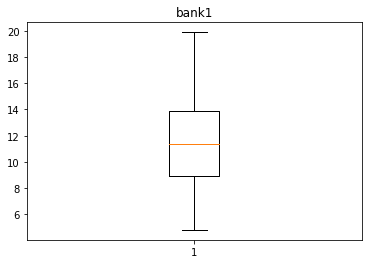

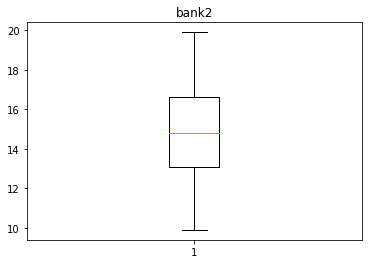

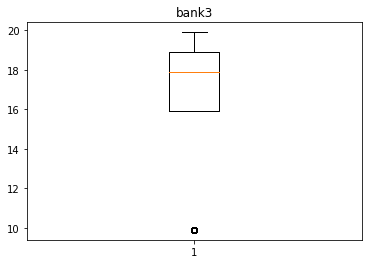

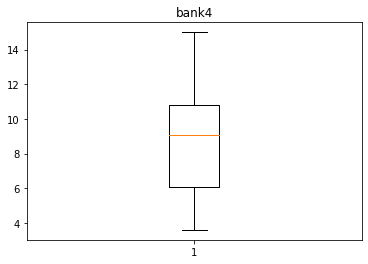

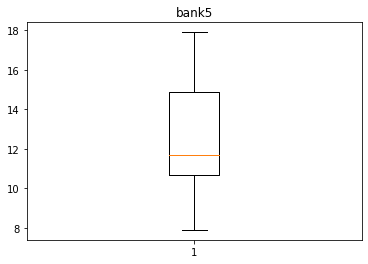

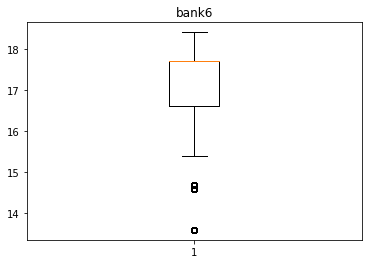

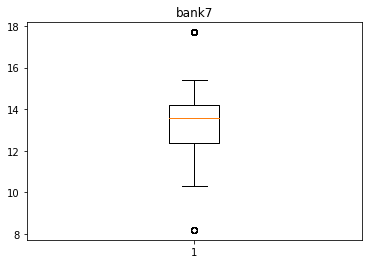

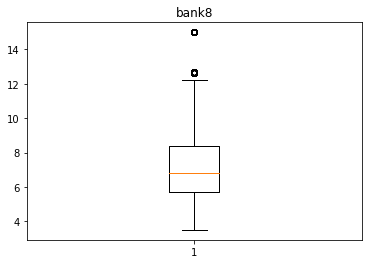

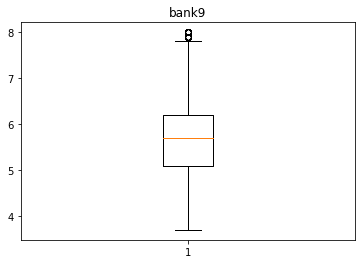

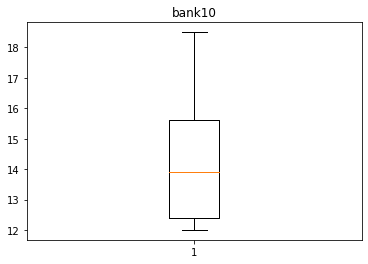

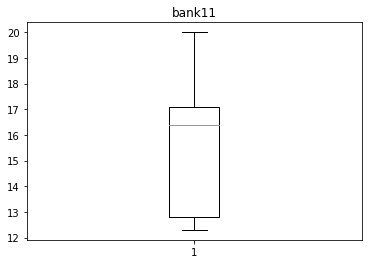

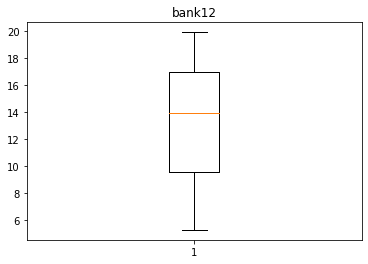

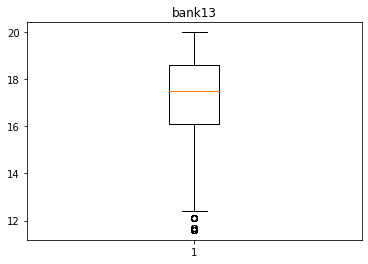

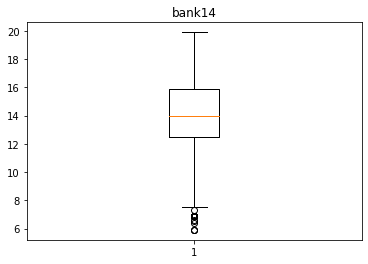

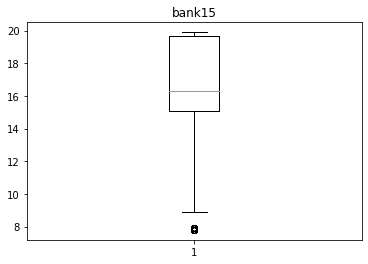

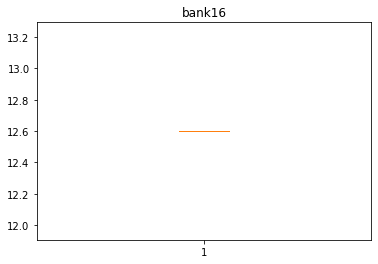

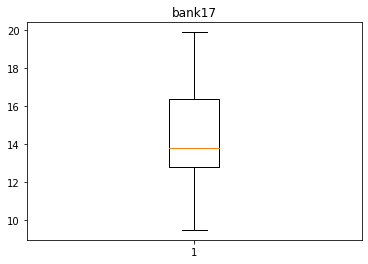

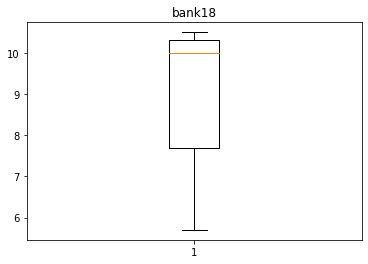

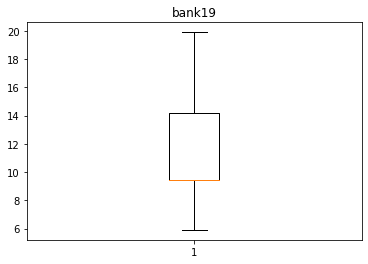

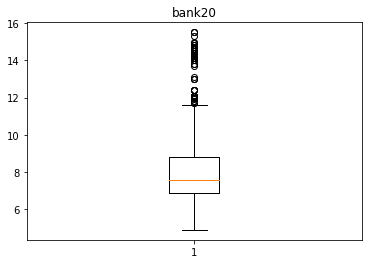

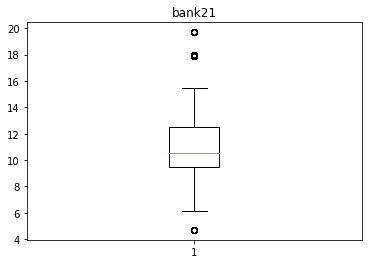

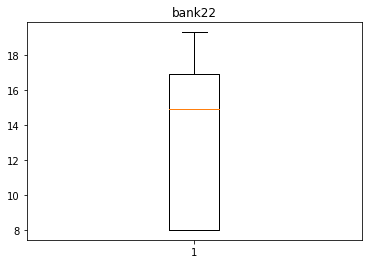

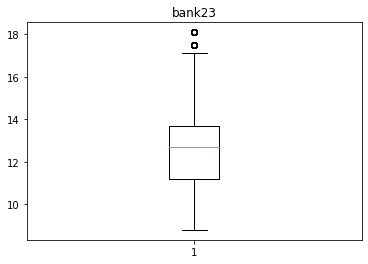

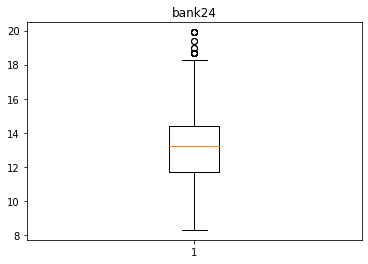

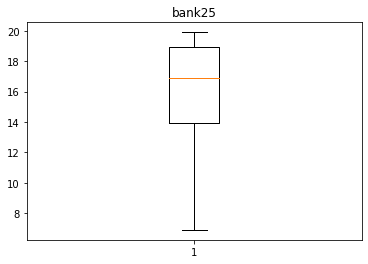

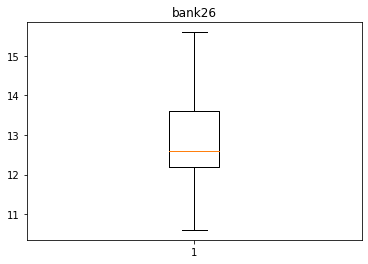

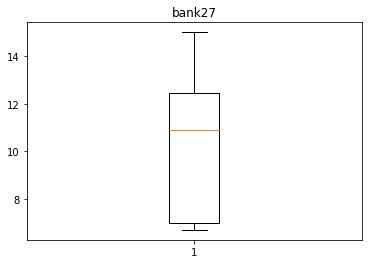

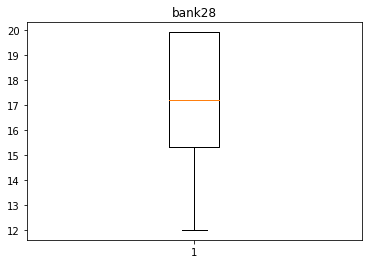

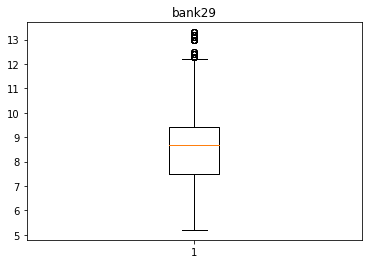

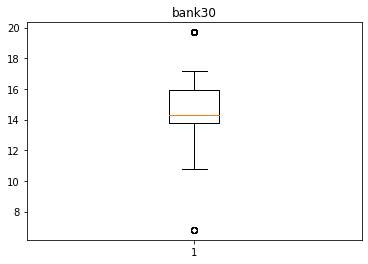

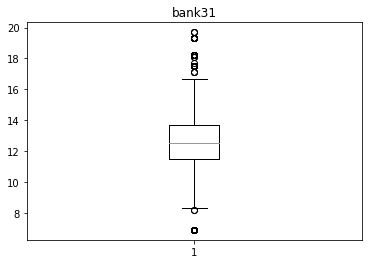

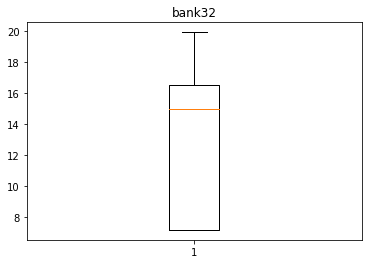

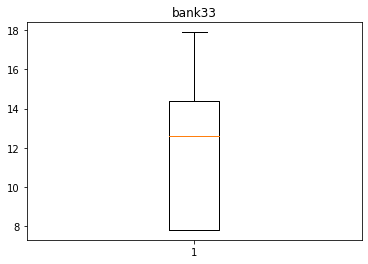

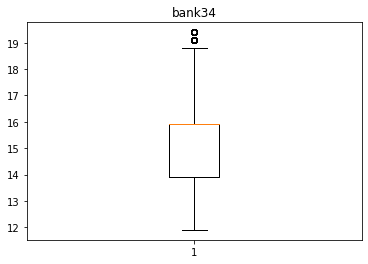

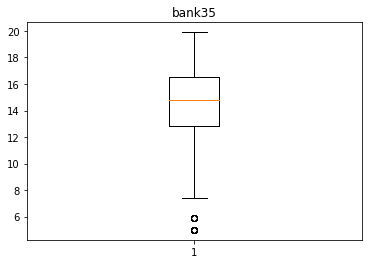

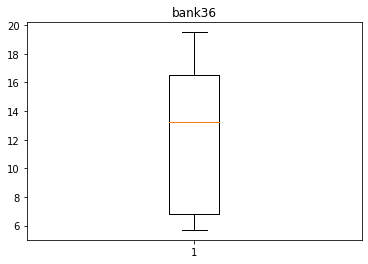

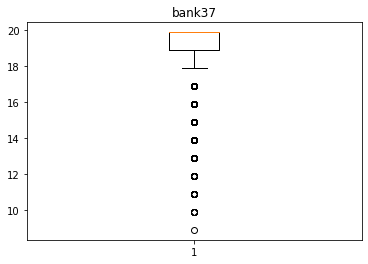

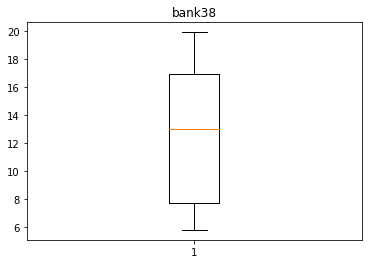

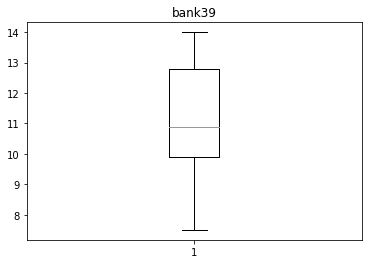

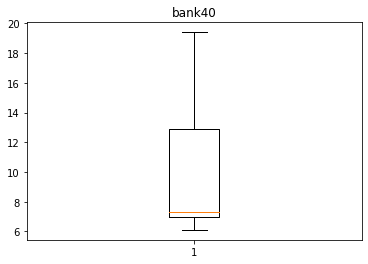

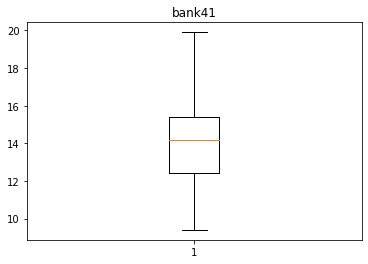

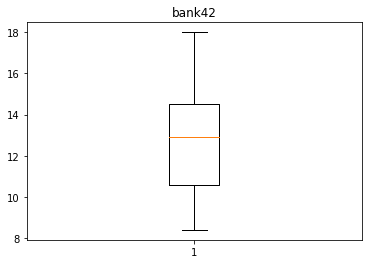

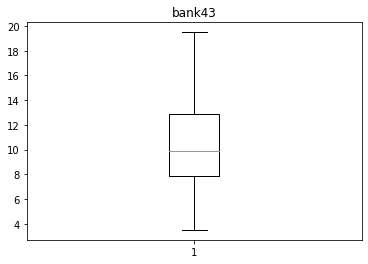

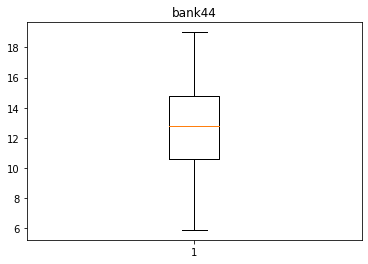

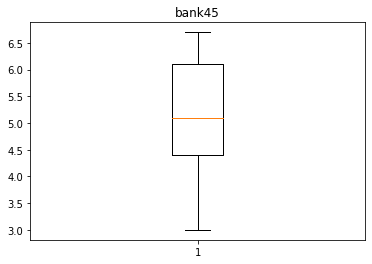

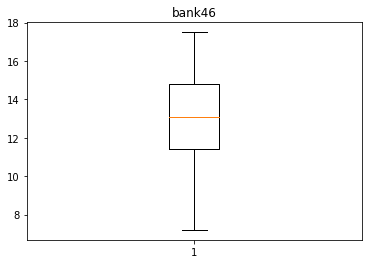

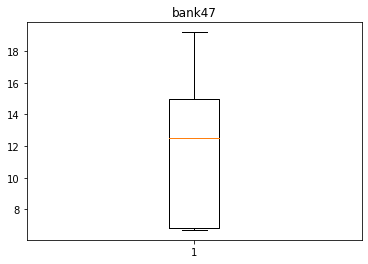

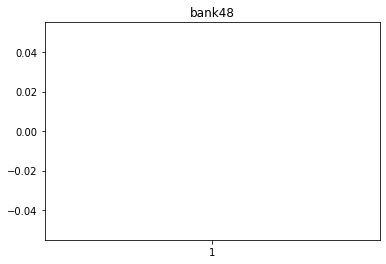

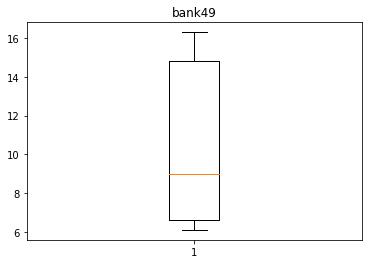

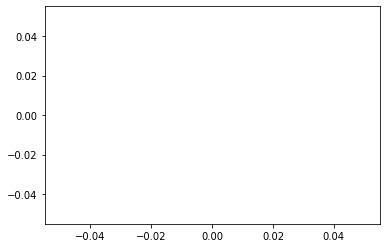

In [129]:
for i in range(1,50):
    plt.boxplot(merged_df[merged_df['bank_id']==i]['loan_rate'])
    plt.title(f'bank{i}')
    plt.show()
    plt.plot()
    

In [123]:
merged_df[['bank_id','loan_rate']].groupby(by='bank_id').mean().sort_values(by='loan_rate').head(60)

,loan_rate
bank_id,
45,5.246861
60,5.420094
9,5.620396
52,7.051724
8,7.396120
20,8.155436
29,8.407755
4,8.661834
18,9.114181


In [ ]:
df.sort_values()

In [4]:
log_df.replace('SignUp','a',inplace=True)
log_df.replace('OpenApp','b',inplace=True)
log_df.replace('Login','c',inplace=True)
log_df.replace('ViewLoanApplyIntro','d',inplace=True)
log_df.replace('StartLoanApply','e',inplace=True)
log_df.replace('CompleteIDCertification','f',inplace=True)
log_df.replace('EndLoanApply','g',inplace=True)
log_df.replace('UseLoanManage','h',inplace=True)
log_df.replace('UsePrepayCalc','i',inplace=True)
log_df.replace('UseDSRCalc','j',inplace=True)
log_df.replace('GetCreditInfo','k',inplace=True)

In [5]:
df=log_df[['user_id','event','timestamp']].groupby(['user_id','event']).count()

In [6]:
df=df.reset_index()

In [7]:
df = pd.get_dummies(data = df, columns=['event'], prefix='event')

In [24]:
df2 = df.copy()

In [25]:
df2['event_a']*=df2['timestamp']
df2['event_b']*=df2['timestamp']
df2['event_c']*=df2['timestamp']
df2['event_d']*=df2['timestamp']
df2['event_e']*=df2['timestamp']
df2['event_f']*=df2['timestamp']
df2['event_g']*=df2['timestamp']
df2['event_h']*=df2['timestamp']
df2['event_i']*=df2['timestamp']
df2['event_j']*=df2['timestamp']
df2['event_k']*=df2['timestamp']

In [27]:
df2.drop(['timestamp'], axis=1, inplace=True)

In [28]:
df2.to_csv('./customData/log_count.csv')

In [30]:
df2

,user_id,event_a,event_b,event_c,event_d,event_e,event_f,event_g,event_h,event_i,event_j,event_k
0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,3
3,7,0,0,0,0,0,0,0,0,0,0,1
4,9,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2860122,879696,0,0,0,0,0,0,0,2,0,0,0
2860123,879696,0,0,0,0,0,0,0,0,0,0,3
2860124,879698,0,1,0,0,0,0,0,0,0,0,0
2860125,879698,0,0,0,1,0,0,0,0,0,0,0


In [253]:
new_merged_df.columns

Index(['index', 'application_id', 'user_id', 'birth_year', 'gender',
       'insert_time', 'credit_score', 'yearly_income', 'income_type',
       'company_enter_month', 'employment_type', 'houseown_type',
       'desired_amount', 'purpose', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt', 'loanapply_insert_time', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied', 'event'],
      dtype='object')

In [250]:
new_merged_df.dropna(inplace=True)

In [254]:
tmp3=new_merged_df.drop(['application_id', 'user_id','insert_time','index','loanapply_insert_time', 'bank_id', 'product_id'],axis=1)

In [255]:
for cate in cate_list:
    tmp3 = pd.get_dummies(data = tmp3, columns=[cate], prefix=cate)

In [256]:
tmp3 =pd.concat([tmp3[tmp3['is_applied']==0].sample(35872, random_state=42), tmp3[tmp3['is_applied']==1].sample(35872, random_state=42)])

In [258]:
X,y =tmp3.loc[:, tmp3.columns !='is_applied'] ,tmp3['is_applied']

In [259]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [260]:
model3 = RandomForestClassifier(random_state=42)

In [261]:
model3.fit(X_train, y_train)

ValueError: could not convert string to float: 'kkhedfg'

In [66]:
model.score(X_test,y_test)

0.8149696842985574

In [67]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.8174630457201788

In [68]:
confusion_matrix(y_test, y_pred)

array([[5749, 1446],
       [1209, 5945]])

In [72]:
print(*sorted(zip(model.feature_importances_, X_test.columns), reverse=True), sep='\n')

(0.17669453178641592, 'credit_score')
(0.17422555789441435, 'loan_rate')
(0.10966848362038831, 'loan_limit')
(0.0911802331985813, 'desired_amount')
(0.07316401850252927, 'company_enter_month')
(0.07020765954422956, 'existing_loan_amt')
(0.0650954087485928, 'yearly_income')
(0.06452869709823061, 'birth_year')
(0.05049083989721915, 'existing_loan_cnt')
(0.01720350127681259, 'income_type_EARNEDINCOME')
(0.01273285867218163, 'purpose_생활비')
(0.012394416368376814, 'gender')
(0.009566323806808422, 'houseown_type_전월세')
(0.009199760277871151, 'houseown_type_기타가족소유')
(0.007593612652192456, 'purpose_대환대출')
(0.007558039525775338, 'employment_type_정규직')
(0.006493953851784805, 'houseown_type_자가')
(0.0064693852902628956, 'employment_type_기타')
(0.006194119056616814, 'income_type_EARNEDINCOME2')
(0.005152871447833591, 'employment_type_계약직')
(0.004292445194494787, 'income_type_PRIVATEBUSINESS')
(0.0037845460118602005, 'personal_rehabilitation_yn')
(0.002934464607936977, 'income_type_PRACTITIONER')
(0.00